In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import metrics
import cv2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
import numpy as np
from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate

import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # uploading the training data not-normalized :
import numpy as np
X_train_image = np.load("/content/drive/MyDrive/rakuten_project_2.0/X_train_image_2.0.npy")
X_test_image = np.load('/content/drive/MyDrive/rakuten_project_2.0/X_test_image_2.0.npy')
y_train = np.load("/content/drive/MyDrive/rakuten_project_2.0/y_train_bin_2.0.npy")
y_test = np.load("/content/drive/MyDrive/rakuten_project_2.0/y_test_bin_2.0.npy")

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Loading pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze all layers except the last few
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Add rescaling layer after the base model
rescaling_layer = layers.Rescaling(1./255)  # Rescale input values to [0, 1]


vgg_model = models.Sequential()
vgg_model.add(base_model)
vgg_model.add(rescaling_layer)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(256, activation='relu'))
vgg_model.add(layers.Dropout(0.5))
vgg_model.add(layers.Dense(27, activation='softmax'))  # 27 output units for your classes

# Compile the VGG16-based model
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# vgg_model.summary()
vgg_model.summary()

In [ ]:
epochs = 10
batch_size = 128

# Fit the VGG16 model :
history = vgg_model.fit(
    X_train_image,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1
)


accuracy = vgg_model.evaluate(X_test_image, y_test)

Epoch 1/10
478/478 [==============================] - 84s 144ms/step - loss: 2.0769 - accuracy: 0.4025 - val_loss: 1.7170 - val_accuracy: 0.5065
Epoch 2/10
478/478 [==============================] - 66s 137ms/step - loss: 1.6649 - accuracy: 0.5143 - val_loss: 1.6054 - val_accuracy: 0.5290
Epoch 3/10
478/478 [==============================] - 71s 149ms/step - loss: 1.4856 - accuracy: 0.5612 - val_loss: 1.5404 - val_accuracy: 0.5540
Epoch 4/10
478/478 [==============================] - 67s 139ms/step - loss: 1.3371 - accuracy: 0.6002 - val_loss: 1.5244 - val_accuracy: 0.5608
Epoch 5/10
478/478 [==============================] - 72s 150ms/step - loss: 1.2026 - accuracy: 0.6372 - val_loss: 1.4971 - val_accuracy: 0.5715
Epoch 6/10
478/478 [==============================] - 67s 140ms/step - loss: 1.0670 - accuracy: 0.6712 - val_loss: 1.5591 - val_accuracy: 0.5662
Epoch 7/10
478/478 [==============================] - 67s 140ms/step - loss: 0.9399 - accuracy: 0.7069 - val_loss: 1.6315 - val_ac

In [ ]:
from tensorflow.keras.models import save_model


vgg_model.save('best_image_vgg_model_2.0.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import shutil

# Define the source and destination paths
source_path = '/content/best_image_vgg_model_2.0.h5'  # Replace with your source file path
destination_path = '/content/drive/MyDrive/rakuten_project_2.0/best_image_vgg_model_2.0.h5'  # Replace with your destination file path

# Copy the file from source to destination
shutil.copyfile(source_path, destination_path)

'/content/drive/MyDrive/rakuten_project_2.0/best_image_vgg_model_2.0.h5'

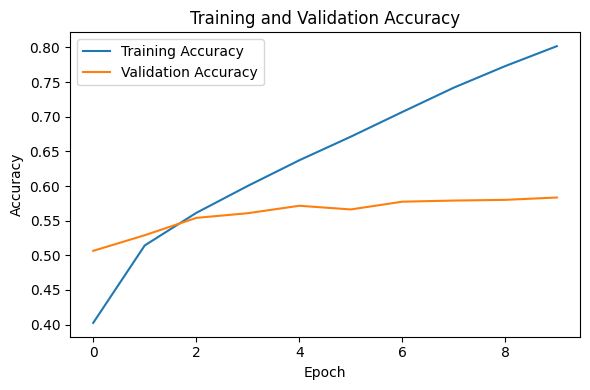

In [ ]:
# Extract training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training accuracy and validation accuracy
plt.figure(figsize=(6, 4))

# Plot training accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot validation accuracy
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

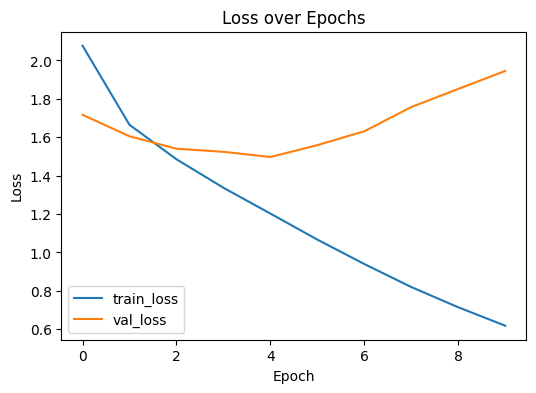

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()